# Overview

Our goal with this project is to further understand how weather may affect taxi rides.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

try:
    trips_df = pd.read_csv('/datasets/project_sql_result_01.csv')
except:
    trips_df = pd.read_csv('/project_sql_result_01.csv')
    
try:
    company_df = pd.read_csv('/datasets/project_sql_result_04.csv')
except:
    company_df = pd.read_csv('/project_sql_result_04.csv')
    
try:
    weather_df = pd.read_csv('/datasets/project_sql_result_07.csv')
except:
    weather_df = pd.read_csv('/project_sql_result_07.csv')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
👍 Nice to see the `try-except` construction here! It makes our code more stable and fail-safety.
</div>

In [2]:
print(weather_df.info())
weather_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


<div class="alert alert-warning">
<b>Reviewer's comment v.1</b> 
    
💡 As a recommendation: please, pay attention to data frame formatting in your project. Don't forget to use `head()`, `tail()`, or `sample()` when outputting large tables. If you leave everything "as is", when you save the project to `GitHub`, all the tables will expand to their full length and take up most of the project. Plus, the Jupyter Notebook wastes extra resources when loading such tables. 
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
👍  Thank you for correcting that!
</div>

In [3]:
print(company_df.info())
company_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [4]:
print(trips_df.info())
trips_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


So far there's few issues in the data such as weather_df not being in panda's datetime and there may only be need for light reprocessing.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
👍 Well done! The data have been loaded and described. Please note, the `info()` method also shows information about missing values, so we could use only one method to detect them. And if the data contain any missing values, we could study them in detail.

</div>

# Reprocessing

In [5]:
weather_df['start_ts'] = pd.to_datetime(weather_df['start_ts'])

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
👍 Correct!

</div>

<div class="alert alert-block alert-info">
<b>Heya, I noticed I actually made an error here and my conversion to datetime wasn't quite correct. This is of course my own error, although it may be helpful to point it out to you as well to notice it in other projects. The original code here was only 
   
    pd.to_datetime(weather_df['start_ts'])
    
Which printed the correct table but didn't actually save the column changes
   
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
👍 Oh, thank you! I focused on the method you used and missed the error.

</div>

In [6]:
company_df.drop_duplicates()
weather_df.drop_duplicates()
trips_df.drop_duplicates()

weather_df = weather_df[weather_df['duration_seconds'] != 0]
weather_df.reset_index(drop=True)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1057,2017-11-11 06:00:00,Good,1500.0
1058,2017-11-11 10:00:00,Good,1318.0
1059,2017-11-11 13:00:00,Good,2100.0
1060,2017-11-11 08:00:00,Good,1380.0


I fixed the start_ts column in weather_df as it originally wasn't in panda's datetime so that we could better work with it. Additionally, I ensured there wasn't any duplicates and removed the outliers for weather_df where the duration of the rides were 0 seconds, and then reset the index.

<div class="alert alert-danger">
<b>Reviewer's comment v.1</b> 
    
✍ I would suggest an additional job here. Please check the data for duplicates and any mistakes, for example, zero values within the `duration_seconds` columns of the weather dataset.
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
👍 Well done!

</div>

# EDA

Here we will explore the data to identify the companies with the largest amount of trips as well as the most popular dropoff locations for rides, and make and analyze their graphs.

<div class="alert alert-warning">
<b>Reviewer's comment v.1</b> 

📝 It makes the project more informative if we add a brief description for the EDA part, including the main steps of data analysis. 
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
👍 Thank you!

</div>

In [7]:
dropoff_10 = company_df.sort_values('average_trips', ascending=False).head(10)
dropoff_10

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
👍 Well done! The top 10 neighborhoods in terms of drop-offs have been obtained. It is good that you sorted the data and selected the first ten entries.

In this case, we could also use the `.nlargest()` method. This method returns the first `n` rows ordered by columns in descending order and is equivalent to `df.sort_values(columns, ascending=False).head(n)`, but more performant.
</div>

<div class="alert alert-block alert-info">
I tried this method just now and the following code block returned an error because I couldn't specify the x and y axis since using nlargest returns a pseudo-dataframe without columns. It also removed the first column, for the dropoff location name.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
📝 Sorry, without your code, it is challenging to suggest why this method provided an error. Please see how we could use this method (it works on the Practicum platform).
</div>

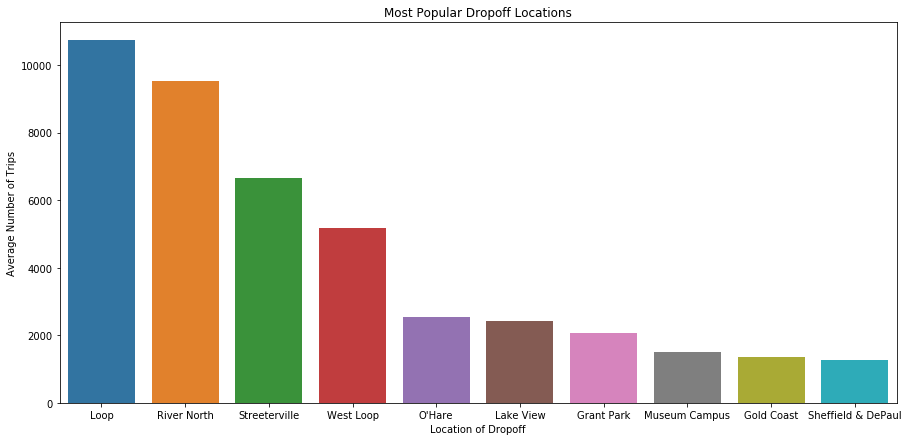

In [8]:
# the reviewer's code:
plt.figure(figsize=(15,7))
sns.barplot(data=company_df.nlargest(10, 'average_trips'), x='dropoff_location_name', y='average_trips');
plt.title('Most Popular Dropoff Locations')
plt.xlabel('Location of Dropoff');
plt.ylabel('Average Number of Trips');

<div class="alert alert-block alert-success">
</div>

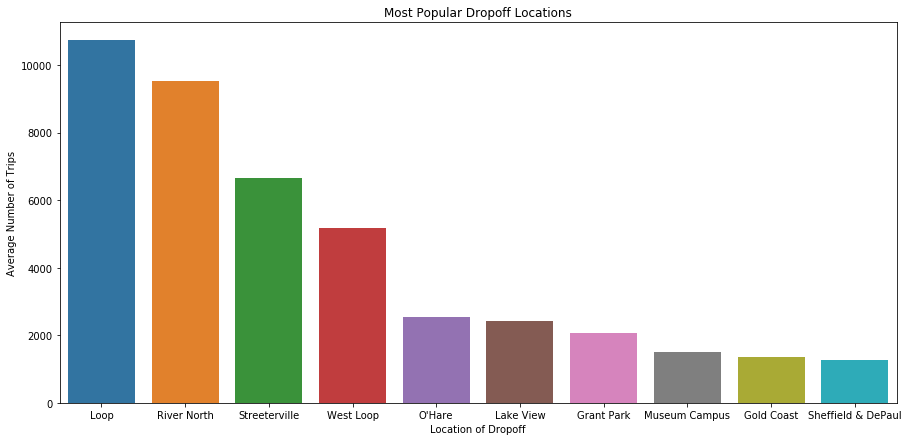

In [9]:
plt.figure(figsize=(15,7))
sns.barplot(data=dropoff_10, x='dropoff_location_name', y='average_trips');
plt.title('Most Popular Dropoff Locations')
plt.xlabel('Location of Dropoff');
plt.ylabel('Average Number of Trips');

<div class="alert alert-danger">
<b>Reviewer's comment v.1</b> 
    
✍ I would suggest an additional job here. It is good practice when all plots within a project are well-designed. They should contain the title and readable axis titles. Please add the title for the graph.
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
👍 Thank you!

</div>

The highest drop off locations can easily surpass the other smallest dropoff locations combined. This is most likely the case that areas such as Loop are residential districts and may be more heavily populated than areas like West Loop may be. The names of each dropoff location seems to be indicitive of why their numbers are so high or low, such as Grant Park likely being a public park, and probably has less dropoffs since people tend to be less likely to visit a park rather than an important area that may contain a lot of workplaces or homes.

<div class="alert alert-success">
<b>Reviewer's comment v.1</b> 
    
👍 Correct!
    
</div>

In [10]:
trips_10 = trips_df.sort_values('trips_amount', ascending=False).head(10)
trips_10

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


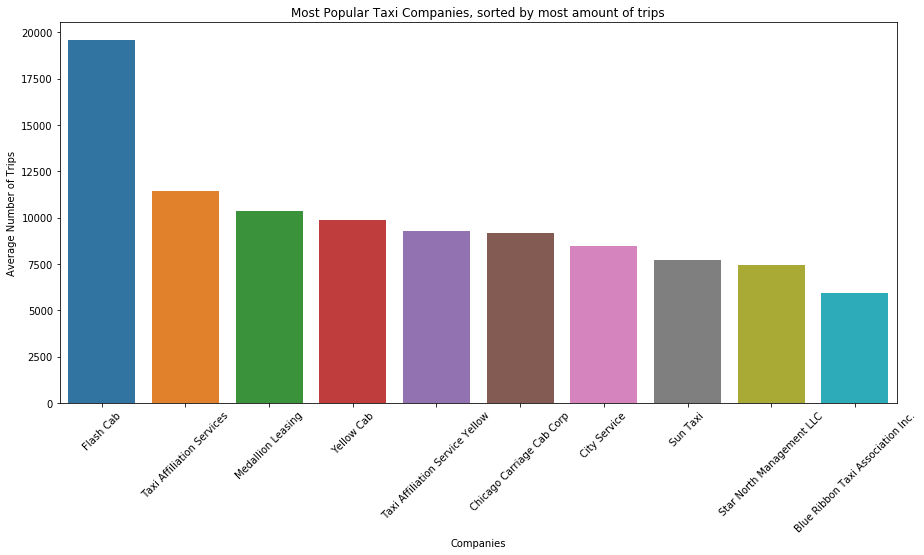

In [11]:
plt.figure(figsize=(15,7))
sns.barplot(data=trips_10, x='company_name', y='trips_amount');
plt.title('Most Popular Taxi Companies, sorted by most amount of trips')
plt.xticks(rotation=45)
plt.xlabel('Companies');
plt.ylabel('Average Number of Trips');

<div class="alert alert-danger">
<b>Reviewer's comment v.1</b> 
    
✍ Please add the title for the graph and increase the axis labels font size. Now it is so small and unreadable.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
👍 Perfect! Thank you!

</div>

Flash Cab gets roughly almost twice as many as the second place competitor, which is typical in a free market as it's easier for a larger company to dominate than an equally split group of companies. However, it may be the case with further analysis that they could have shorter/better service and drive times. The other companies aside from Flash Cab have a linearly decreasing amount of trips but are comparably not too significant, where the first to the next closest top company, second in the most trips, is a 58% difference, and the difference from the second top to the tenth top company is only a 52% decrease. This is significant because the 52% decrease is the largest difference between nine companies whereas the 58% is the difference between only the top two and still manages to be larger.

Additionally, it's likely the case that Flash Cab is responsible for the most dropoffs for our dropoff_10 dataset because they have a much larger customer base.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
👍 Good job at this stage! The top-10 drop-off locations and top taxi companies have been observed and described. I like your conclusions style. 

</div>

<div class="alert alert-block alert-info">
<b>The task page asks us to analyze things such as:
    
    -identify the top 10 neighborhoods in terms of drop-offs
    -make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
    -draw conclusions based on each graph and explain the results
    
But how does this help us get closer to the conclusion of whether weather conditions may affect ride duration? This analysis may be helpful if our goal was different, but I don't see the point here.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
📝  Well, I think that we could move this part with the main tasks at the start of this chapter. About your question: yes, I agree with you that it is a bit strange because the first two tasks did not accompany the last one. So I would suggest that we should consider them as separate tasks. However, please do not forget that we have studied the average duration of rides from the Loop to O'Hare International Airport where the Loop is the most popular neighborhood in Chicago. https://loopchicago.com/
</div>

# Testing the Hypothesis

**Null**: The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays.

**Alternative**: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [12]:
results = st.ttest_ind(weather_df.loc[weather_df['weather_conditions'] == 'Bad']['duration_seconds'],
                        weather_df.loc[weather_df['weather_conditions'] == 'Good']['duration_seconds'])

alpha = 0.05

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  1.3318772977743245e-11
We reject the null hypothesis


The hypothesis was formulated based off the hypothesis that was given to us (in fact, it's the exact same). The null hypothesis is assuming the duration is the same as on rainy days, where the alternative assumes it's different, as that's the nature of a null and alternative hypothesis. The p-value wasn't given any special attention, 0.05 is a standard value when testing a hypothesis. The critereon for testing the hypothesis was to search specifically for weather conditions considered 'Bad' and the durations of the trips for the first value, and the same for the second except for 'Good' weather conditions. This seems to be the best values to go about testing this kind of hypothesis.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
👍 If we consider the test part, you have done a perfect job: the hypotheses have been formulated, the code and the interpretations of the results are correct.
    
</div>

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1</b> 
    
✍ I would suggest some additional jobs here. Please note that the result of the t-test depends on the presence of outliers in the data. So we should check that. Also, please display the values that we compared within the test results. It makes results more informative we will know how the duration be changed.
</div>

In [13]:
print('Average ride duration for Saturdays in bad weather:', weather_df.loc[weather_df['weather_conditions'] == 'Bad']['duration_seconds'].mean())
print('Average ride duration for Saturdays in good weather:', weather_df.loc[weather_df['weather_conditions'] == 'Good']['duration_seconds'].mean())

Average ride duration for Saturdays in bad weather: 2427.2055555555557
Average ride duration for Saturdays in good weather: 2013.2789115646258


Looking at the mean times for ride duration in both types of weather the difference becomes more clear: The gap in means represents an almost 21% increase in ride duration from rides in good weather.

<div class="alert alert-block alert-info">
I wasn't entirely sure what data you wanted to see here, I used the values in the t-test as asked but printing out the table of values seems far too unwieldy, as well as more difficult to interpret, so I found the mean times for these two tables slices instead.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
👍 Correct! I meant the mean values for the two samples that we compared. Also, I suggested that it is better to check the data for anomalies before tests. Like that:
    
</div>

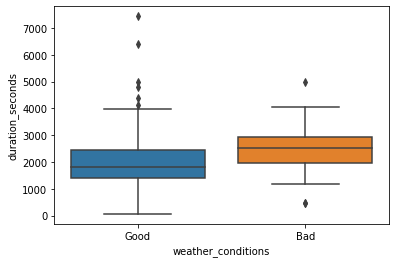

p-value:  4.553857606148197e-13
We reject the null hypothesis


In [14]:
# the reviewer's code: let's check the data for anomalies:
sns.boxplot(x="weather_conditions", y="duration_seconds", data=weather_df)
plt.show()

# as you can see, we have some anomalies higher than 4000 sec. So we could filter them in the test:
results = st.ttest_ind(weather_df.query('weather_conditions == "Bad" and duration_seconds < 4000')['duration_seconds'],
                       weather_df.query('weather_conditions == "Good" and duration_seconds < 4000')['duration_seconds'])
alpha = 0.05

print('p-value: ', results.pvalue)
if results.pvalue < alpha: print("We reject the null hypothesis")
else: print("We can't reject the null hypothesis")

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
👍 Also, we could visualize the compared values:
    
</div>

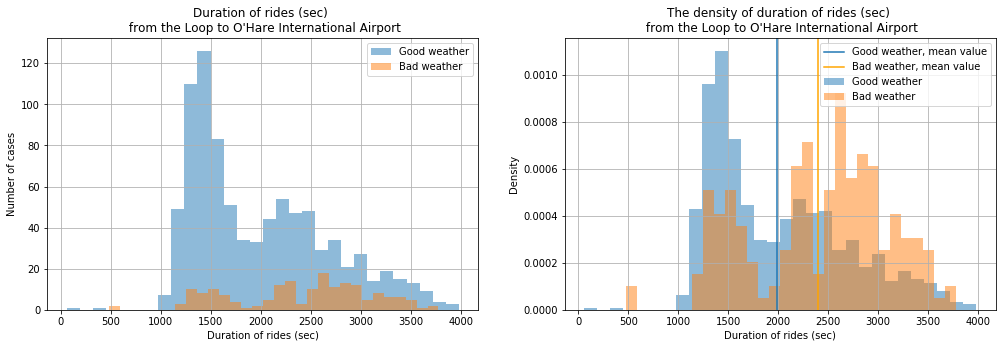

In [15]:
# the reviewer's code:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
axs[0].hist(x = weather_df.query('weather_conditions == "Good" and duration_seconds < 4000')['duration_seconds'], 
            bins = 30, alpha = 0.5, label = "Good weather")
axs[0].hist(x = weather_df.query('weather_conditions == "Bad" and duration_seconds < 4000')['duration_seconds'], 
            bins = 30, alpha = 0.5, label = "Bad weather") 
axs[0].grid()
axs[0].set_title('Duration of rides (sec) \n from the Loop to O\'Hare International Airport')
axs[0].set_xlabel('Duration of rides (sec)')
axs[0].set_ylabel('Number of cases')
axs[0].legend()

axs[1].hist(x = weather_df.query('weather_conditions == "Good" and duration_seconds < 4000')['duration_seconds'], 
            bins = 30, alpha = 0.5, density = True, label = "Good weather")
axs[1].hist(x = weather_df.query('weather_conditions == "Bad" and duration_seconds < 4000')['duration_seconds'], 
            bins = 30, alpha = 0.5, density = True, label = "Bad weather") 
axs[1].grid()
axs[1].set_title('The density of duration of rides (sec) \n from the Loop to O\'Hare International Airport')
axs[1].set_xlabel('Duration of rides (sec)')
axs[1].set_ylabel('Density')

axs[1].axvline(weather_df.query('weather_conditions == "Good" and duration_seconds < 4000')['duration_seconds'].mean(),
              label = "Good weather, mean value")
axs[1].axvline(weather_df.query('weather_conditions == "Bad" and duration_seconds < 4000')['duration_seconds'].mean(),
              label = "Bad weather, mean value", c = 'orange')
axs[1].legend()

plt.show()

# Conclusion

The analysis shows that bad weather will generally negatively affect taxi ride durations. The data may be skewed in that our focus for wether weather conditions may affect ride durations are focusing on a specific route and a specific day of the week. If this was a real project, I personally wouldn't use something so specific as it may skew the results.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v.1:</b> 
    
📝 Theoretically, we would study how the average duration of rides from the Loop to O'Hare International Airport changes throughout the day. Most probable that the trip duration could be affected by the increase in road traffic during rush hour.
</div>

The taxi companies data show there's a dominance of one company, Flash Cab, in the taxi trips with other companies making much less trips in comparison but with all other companies combined Flash Cab is still a minority. There is also a large amount of dropoffs to certain areas moreso than others, which may hint these areas are residential areas. Connecting these two conclusions together, a big amount of trips to these residential areas are likely from Flash Cab which could possibly skew the results as Flash Cab may have specific regulations for drivers to go slower in harsher weather.

Overall, there is a significant difference in taxi ride durations in bad weather than in good weather.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v.1:</b> 
    
👍 Well done!
</div>